# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings

#Setup

%matplotlib inline
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

from IPython.core.pylabtools import figsize
figsize(15, 15)

warnings.filterwarnings('ignore')

## reading csv files

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((13730, 166), (4570, 43))

We can see that the test and train datasets have different amount of columns.
Therefore we have to analyse which columns are the same for both datasets.

In [4]:
columns = list(train.columns & test.columns)

Note that the target variable(`IN_TREINEIRO`) is not included in the list above.

## Filtering the datasets with the columns name above

#### Train dataset 

In [5]:
df_train = train[columns]
df_train['IN_TREINEIRO'] = train['IN_TREINEIRO']

#### Test dataset 

In [6]:
df_test = test[columns]

## Analysing target variable

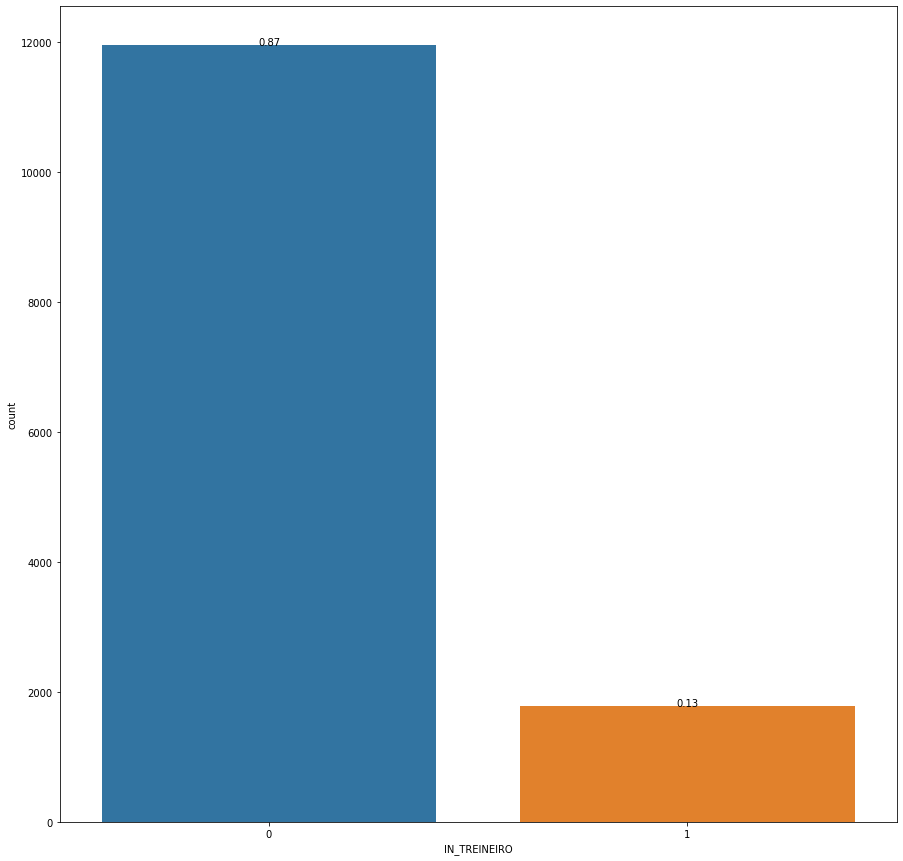

In [7]:
ax = sns.countplot('IN_TREINEIRO',data = df_train)
total =len(df_train['IN_TREINEIRO'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

According to the plot above, we are dealing with an imbalanced dataset.

87% of the people who had took the test were not in training, hence 13% were in training condition.


#### First we are going to process the dataframe (clean it and feature engineering) and then we can handle the imbalanced issue.

## Let's join the df_train and df_test datasets

In [8]:
df_train['train'] = True
df_test['train'] = False

In [9]:
df = pd.concat([df_train,df_test])

## EDA

In [10]:
#Criando df auxiliar
def auxiliar_df(df):
    df_aux = pd.DataFrame({'columns':df.columns,
                           'type':df.dtypes,
                           'unique': df.nunique(),
                           'missing':df.isnull().sum(),
                           'size': df.shape[0]})
    df_aux['missing_%']=round(df_aux['missing']/df_aux['size'],2)
    return df_aux
df_aux = auxiliar_df(df)
df_aux

columns     type  unique  missing  \
NU_INSCRICAO                      NU_INSCRICAO   object   18300        0   
CO_UF_RESIDENCIA              CO_UF_RESIDENCIA    int64      27        0   
SG_UF_RESIDENCIA              SG_UF_RESIDENCIA   object      27        0   
NU_IDADE                              NU_IDADE    int64      55        0   
TP_SEXO                                TP_SEXO   object       2        0   
TP_COR_RACA                        TP_COR_RACA    int64       6        0   
TP_NACIONALIDADE              TP_NACIONALIDADE    int64       5        0   
TP_ST_CONCLUSAO                TP_ST_CONCLUSAO    int64       4        0   
TP_ANO_CONCLUIU                TP_ANO_CONCLUIU    int64      11        0   
TP_ESCOLA                            TP_ESCOLA    int64       4        0   
TP_ENSINO                            TP_ENSINO  float64       3    12592   
TP_DEPENDENCIA_ADM_ESC  TP_DEPENDENCIA_ADM_ESC  float64       4    12592   
IN_BAIXA_VISAO                  IN_BAIXA_VISAO    int64       2        0   
IN_CEGUEIRA                        IN_CEGUEIRA    int64       2        0   
IN_SURDEZ                            IN_SURDEZ    int64       2        0   
IN_DISLEXIA                        IN_DISLEXIA    int64       2        0   
IN_DISCALCULIA                  IN_DISCALCULIA    int64       2        0   
IN_SABATISTA                      IN_SABATISTA    int64       2        0   
IN_GESTANTE                        IN_GESTANTE    int64       2        0   
IN_IDOSO                              IN_IDOSO    int64       2        0   
TP_PRESENCA_CN                  TP_PRESENCA_CN    int64       3        0   
TP_PRESENCA_CH                  TP_PRESENCA_CH    int64       3        0   
TP_PRESENCA_LC                  TP_PRESENCA_LC    int64       3        0   
TP_PRESENCA_MT                  TP_PRESENCA_MT    int64       3        0   
NU_NOTA_CN                          NU_NOTA_CN  float64    2848     4501   
NU_NOTA_CH                          NU_NOTA_CH  float64    3179     4501   
NU_NOTA_LC                          NU_NOTA_LC  float64    2942     4767   
TP_LINGUA                            TP_LINGUA    int64       2        0   
TP_STATUS_REDACAO            TP_STATUS_REDACAO  float64       9     4767   
NU_NOTA_COMP1                    NU_NOTA_COMP1  float64      16     4767   
NU_NOTA_COMP2                    NU_NOTA_COMP2  float64      14     4767   
NU_NOTA_COMP3                    NU_NOTA_COMP3  float64      12     4767   
NU_NOTA_COMP4                    NU_NOTA_COMP4  float64      15     4767   
NU_NOTA_COMP5                    NU_NOTA_COMP5  float64      14     4767   
NU_NOTA_REDACAO                NU_NOTA_REDACAO  float64      54     4767   
Q001                                      Q001   object       8        0   
Q002                                      Q002   object       8        0   
Q006                                      Q006   object      17        0   
Q024                                      Q024   object       5        0   
Q025                                      Q025   object       2        0   
Q026                                      Q026   object       3        0   
Q027                                      Q027   object      13     9810   
Q047                                      Q047   object       5        0   
IN_TREINEIRO                      IN_TREINEIRO  float64       2     4570   
train                                    train     bool       2        0   

                         size  missing_%  
NU_INSCRICAO            18300       0.00  
CO_UF_RESIDENCIA        18300       0.00  
SG_UF_RESIDENCIA        18300       0.00  
NU_IDADE                18300       0.00  
TP_SEXO                 18300       0.00  
TP_COR_RACA             18300       0.00  
TP_NACIONALIDADE        18300       0.00  
TP_ST_CONCLUSAO         18300       0.00  
TP_ANO_CONCLUIU         18300       0.00  
TP_ESCOLA               18300       0.00  
TP_ENSINO               18300       0.69  
TP_DEPENDENCIA_ADM_ESC  18

we can drop the columns that have more than 50% of missing data

In [11]:
columns_todrop = list(df_aux[df_aux['missing_%']>=0.5]['columns'])
columns_todrop

['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027']

In [12]:
df.drop(columns_todrop, axis=1, inplace = True)

We can drop the `SG_UF_RESIDENCIA`because we have the encoded column `CO_UF_RESIDENCIA`

In [13]:
df.drop('SG_UF_RESIDENCIA', axis=1, inplace = True)

   We have 4767 NaN values for `TP_STATUS_REDACAO`, `NU_NOTA_COMP1`, `NU_NOTA_COMP2`, `NU_NOTA_COMP3`, `NU_NOTA_COMP4`, `NU_NOTA_COMP5`, and `NU_NOTA_REDACAO`. All of them are for essay grade. We can assume the student didn't do the essay. So we can use `fillna` to 0, and for `TP_STATUS_REDACAO` we have to imput the nan values to 4, which means `in blank`.

In [14]:
cols_to_input= [
    'NU_NOTA_COMP1', 
    'NU_NOTA_COMP2', 
    'NU_NOTA_COMP3', 
    'NU_NOTA_COMP4', 
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO']

# fill missing values for cols_to_input

for feature in cols_to_input:
    df[feature]=df[feature].fillna(0) 

# fill missing values for TP_STATUS_REDACAO

df['TP_STATUS_REDACAO']=df['TP_STATUS_REDACAO'].fillna(4)
auxiliar_df(df)

columns     type  unique  missing   size  \
NU_INSCRICAO            NU_INSCRICAO   object   18300        0  18300   
CO_UF_RESIDENCIA    CO_UF_RESIDENCIA    int64      27        0  18300   
NU_IDADE                    NU_IDADE    int64      55        0  18300   
TP_SEXO                      TP_SEXO   object       2        0  18300   
TP_COR_RACA              TP_COR_RACA    int64       6        0  18300   
TP_NACIONALIDADE    TP_NACIONALIDADE    int64       5        0  18300   
TP_ST_CONCLUSAO      TP_ST_CONCLUSAO    int64       4        0  18300   
TP_ANO_CONCLUIU      TP_ANO_CONCLUIU    int64      11        0  18300   
TP_ESCOLA                  TP_ESCOLA    int64       4        0  18300   
IN_BAIXA_VISAO        IN_BAIXA_VISAO    int64       2        0  18300   
IN_CEGUEIRA              IN_CEGUEIRA    int64       2        0  18300   
IN_SURDEZ                  IN_SURDEZ    int64       2        0  18300   
IN_DISLEXIA              IN_DISLEXIA    int64       2        0  18300   
IN_DISCALCULIA        IN_DISCALCULIA    int64       2        0  18300   
IN_SABATISTA            IN_SABATISTA    int64       2        0  18300   
IN_GESTANTE              IN_GESTANTE    int64       2        0  18300   
IN_IDOSO                    IN_IDOSO    int64       2        0  18300   
TP_PRESENCA_CN        TP_PRESENCA_CN    int64       3        0  18300   
TP_PRESENCA_CH        TP_PRESENCA_CH    int64       3        0  18300   
TP_PRESENCA_LC        TP_PRESENCA_LC    int64       3        0  18300   
TP_PRESENCA_MT        TP_PRESENCA_MT    int64       3        0  18300   
NU_NOTA_CN                NU_NOTA_CN  float64    2848     4501  18300   
NU_NOTA_CH                NU_NOTA_CH  float64    3179     4501  18300   
NU_NOTA_LC                NU_NOTA_LC  float64    2942     4767  18300   
TP_LINGUA                  TP_LINGUA    int64       2        0  18300   
TP_STATUS_REDACAO  TP_STATUS_REDACAO  float64       9        0  18300   
NU_NOTA_COMP1          NU_NOTA_COMP1  float64      16        0  18300   
NU_NOTA_COMP2          NU_NOTA_COMP2  float64      14        0  18300   
NU_NOTA_COMP3          NU_NOTA_COMP3  float64      12        0  18300   
NU_NOTA_COMP4          NU_NOTA_COMP4  float64      15        0  18300   
NU_NOTA_COMP5          NU_NOTA_COMP5  float64      14        0  18300   
NU_NOTA_REDACAO      NU_NOTA_REDACAO  float64      54        0  18300   
Q001                            Q001   object       8        0  18300   
Q002                            Q002   object       8        0  18300   
Q006                            Q006   object      17        0  18300   
Q024                            Q024   object       5        0  18300   
Q025                            Q025   object       2        0  18300   
Q026                            Q026   object       3        0  18300   
Q047                            Q047   object       5        0  18300   
IN_TREINEIRO            IN_TREINEIRO  float64       2     4570  18300   
train                          train     bool       2        0  18300   

                   missing_%  
NU_INSCRICAO            0.00  
CO_UF_RESIDENCIA        0.00  
NU_IDADE                0.00  
TP_SEXO                 0.00  
TP_COR_RACA             0.00  
TP_NACIONALIDADE        0.00  
TP_ST_CONCLUSAO         0.00  
TP_ANO_CONCLUIU         0.00  
TP_ESCOLA               0.00  
IN_BAIXA_VISAO          0.00  
IN_CEGUEIRA             0.00  
IN_SURDEZ               0.00  
IN_DISLEXIA             0.00  
IN_DISCALCULIA          0.00  
IN_SABATISTA            0.00  
IN_GESTANTE             0.00  
IN_IDOSO                0.00  
TP_PRESENCA_CN          0.00  
TP_PRESENCA_CH          0.00  
TP_PRESENCA_LC          0.00  
TP_PRESENCA_MT          0.00  
NU_NOTA_CN              0.25  
NU_NOTA_CH              0.25  
NU_NOTA_LC              0.26  
TP_LINGUA               0.00  
TP_STATUS_REDACAO       0.00  
NU_NOTA_COMP1           0.00  
NU_NOTA_COMP2           0.00  
NU_NOTA_COMP3           0.00  
NU_NOTA_COMP4           0.00  
N

For `NU_NOTA_CN`, `NU_NOTA_CH`, `NU_NOTA_LC`. We are going to imput the NaN values to 0, which means the student was absent at the test date. 

In [15]:
for feature in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']:
    df[feature]=df[feature].fillna(0) 

In [16]:
df.isnull().sum()

NU_INSCRICAO            0
CO_UF_RESIDENCIA        0
NU_IDADE                0
TP_SEXO                 0
TP_COR_RACA             0
TP_NACIONALIDADE        0
TP_ST_CONCLUSAO         0
TP_ANO_CONCLUIU         0
TP_ESCOLA               0
IN_BAIXA_VISAO          0
IN_CEGUEIRA             0
IN_SURDEZ               0
IN_DISLEXIA             0
IN_DISCALCULIA          0
IN_SABATISTA            0
IN_GESTANTE             0
IN_IDOSO                0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
TP_PRESENCA_MT          0
NU_NOTA_CN              0
NU_NOTA_CH              0
NU_NOTA_LC              0
TP_LINGUA               0
TP_STATUS_REDACAO       0
NU_NOTA_COMP1           0
NU_NOTA_COMP2           0
NU_NOTA_COMP3           0
NU_NOTA_COMP4           0
NU_NOTA_COMP5           0
NU_NOTA_REDACAO         0
Q001                    0
Q002                    0
Q006                    0
Q024                    0
Q025                    0
Q026                    0
Q047        

We don't have any more missing values

## Feature Engineering

#### Let's analyse the feature `NU_IDADE`

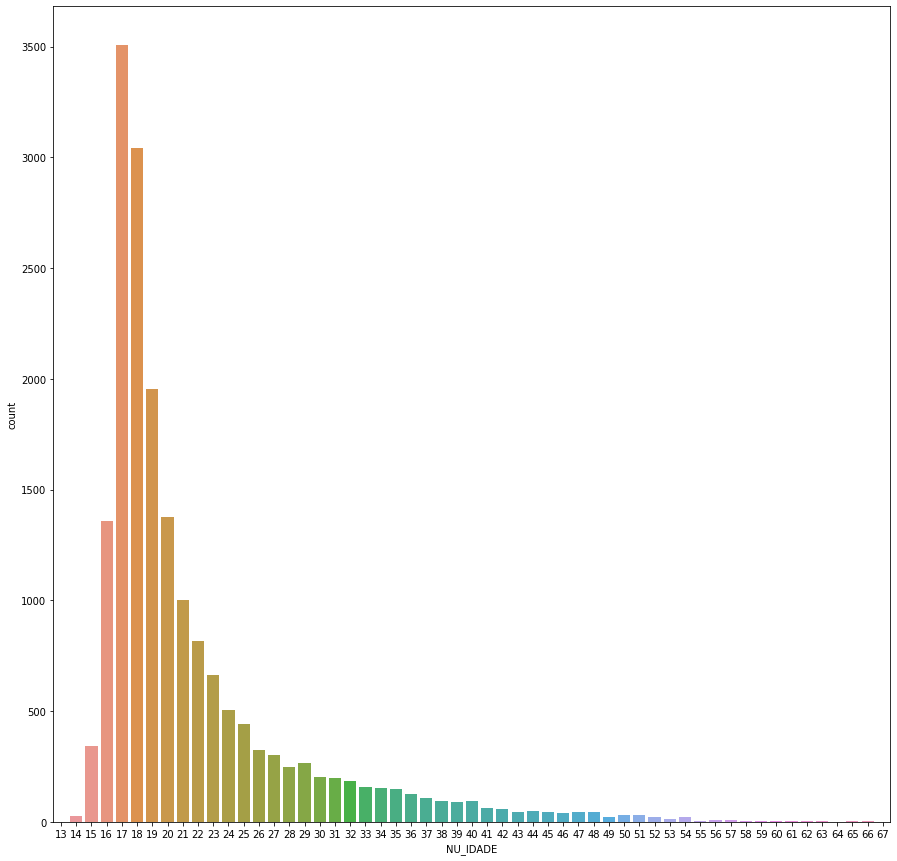

In [17]:
sns.countplot('NU_IDADE',data=df)

We can see some data concentration to the left, therefore it is possible to create a category column to simplify this feature  

In [18]:
df['TP_IDADE_CATEGORY'] = np.int64(pd.cut(df['NU_IDADE'], bins=[0, 16, 19, 22, 24, 27, 33, 41, 100], labels=range(8)).ravel())

As we create the feature `TP_IDADE_CATEGORY`. we can drop the folowing columns: `NU_IDADE`, `IN_IDOSO`.

In [19]:
df.drop(['NU_IDADE','IN_IDOSO'],axis=1, inplace=True)

#### Let's create a column for disabled people

In [20]:
#Creating PCD feature
df['PCD']= np.int64(df.IN_BAIXA_VISAO | df.IN_SURDEZ | df.IN_DISLEXIA | df.IN_DISCALCULIA | df.IN_CEGUEIRA)  


Now that we create the column `PCD`, we can drop the columns as follows:

In [21]:
df.drop(['IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_CEGUEIRA'], axis= 1, inplace= True)

#### Let's create a column for foreign people

1 -> Foreign

0 -> Brazilian

In [22]:
mapping = {1:0,2:0,3:1,4:0,0:0}

df['ESTRANGEIRO']= df['TP_NACIONALIDADE'].map(mapping)

now we can drop the column `TP_NACIONALIDADE`

In [23]:
df.drop('TP_NACIONALIDADE',axis=1, inplace=True)

## Let's encode the categoric features using `pd.dummies`

In [24]:
df = df.set_index('NU_INSCRICAO')
col_to_encode = list(df.select_dtypes(include =['O']).columns)

df = pd.get_dummies(df, columns = col_to_encode)

Now it is time to split the `df` to `train` and `test` dataset

### Train dataset

In [25]:
df_train_imbalanced = df[df['train']==True]

In [26]:
df_train_imbalanced.drop('train', axis=1, inplace= True)

### Test dataset

In [27]:
df_val = df[df['train']==False]

In [28]:
df_val.drop(['train','IN_TREINEIRO'], axis=1, inplace= True )

### Target variable

In [29]:
y_train_imbalanced = df_train_imbalanced['IN_TREINEIRO']

In [30]:
df_train_imbalanced.drop('IN_TREINEIRO', axis=1, inplace= True)

## Now let's fix the imbalanced dataset issue

We can use the `SMOTE` algorithm

In [31]:
y_train_imbalanced.value_counts()

0.0    11947
1.0     1783
Name: IN_TREINEIRO, dtype: int64

We can see that the proportion between `1` and `0` is very different

In [32]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(df_train_imbalanced, y_train_imbalanced)

In [33]:
y_smote.value_counts()

1.0    11947
0.0    11947
Name: IN_TREINEIRO, dtype: int64

After we balanced the dataset we can see the proportion is 50%

## Now let's split the `X_smote` and `y_smote` to `train` and `test` dataset using `train_test_split`

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

## Let's create the classification model

### LogisticRegression

In [35]:
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

LogisticRegression()

In [36]:
#y_pred = logistic.predict(X_test)

##### Metric

In [37]:
logistic.score(X_test,y_test)

0.9746129167247872

### KNeighborsClassifier

In [38]:
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over different values of k

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

In [39]:
print(train_accuracy)
print(test_accuracy)

[0.99964126 0.9922272  0.90529148 0.91772795 0.86266069 0.87790732
 0.83623318 0.85022422 0.81793722]
[0.87557539 0.88701353 0.8291254  0.8476775  0.81085228 0.8225694
 0.79327661 0.80457525 0.77946715]


### Decision Tree Classifier

In [40]:
param_dist = {'max_depth':[2,3,4,5,6,None],
              'max_features':randint(1,9),
              'min_samples_leaf':randint(1,9)
    
}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=5)
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11f13db50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120affa60>})

In [41]:
print('Tuned Decisions Tree Parameters: {}'.format(tree_cv.best_params_))

Tuned Decisions Tree Parameters: {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 1}


In [42]:
print('Best score is {}'.format(tree_cv.best_score_))

Best score is 0.8627204783258596


### therefore logistic regression was the best model

In [48]:
y_pred = logistic.predict(df_val)

In [49]:
answer = pd.DataFrame({'NU_INSCRICAO':df_val.index,
                       'IN_TREINEIRO':y_pred })

In [50]:
answer.to_csv('answer.csv',index=False)

In [51]:
answer

NU_INSCRICAO  IN_TREINEIRO
0     ba0cc30ba34e7a46764c09dfc38ed83d15828897           0.0
1     177f281c68fa032aedbd842a745da68490926cd2           0.0
2     6cf0d8b97597d7625cdedc7bdb6c0f052286c334           1.0
3     5c356d810fa57671402502cd0933e5601a2ebf1e           0.0
4     df47c07bd881c2db3f38c6048bf77c132ad0ceb3           0.0
...                                        ...           ...
4565  361b7fcd8867119550fe2af5aa729ffad89a7cf5           0.0
4566  d8a0e4c9e29494cc9bba2422bd79333931475ee1           0.0
4567  3f1c3388244df8d6521e983a809292d9f3bca643           0.0
4568  1778e9c4cef591beb6b986d191d15ed05de816b0           0.0
4569  096809759695097e384e766d2d9e23a34fc81610           0.0

[4570 rows x 2 columns]